## Ejercicio 1.

Carga y Exploración de Datos

Objetivo: Familiarizarse con el conjunto de datos y comprender la distribución de las categorías.

Acciones:
Cargar el archivo Noticias.xlsx que contiene las noticias.

Explorar la distribución de la columna Etiqueta para ver cuántas noticias pertenecen a cada categoría.

Visualizar esta distribución mediante gráficos para identificar las categorías más frecuentes.

Contexto: La columna Etiqueta en el conjunto de datos contiene categorías, algunas no especializadas o no tienen un enfoque específico (por ejemplo, "archivo"). Para esta actividad, nos centraremos en noticias de las categorías especializadas: deportes, cultura, economía y justicia. Estas categorías son relevantes porque representan temas con un enfoque claro y específico, lo que hace que la clasificación sea más útil y aplicable en el análisis de noticias.

In [69]:
# Importar las bibliotecas necesarias
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import numpy as np

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [70]:
# Cargar el archivo de datos
file_path = '../Datos/Noticias.xlsx'
data = pd.read_excel(file_path)

# Mostrar una vista previa de los datos
data.head()

,Columna1,Enlaces,Título,info,contenido,Etiqueta
0,0,https://www.eltiempo.com/agresion-contra-un-op...,Operador de grúa quedó inconsciente tras agres...,El conductor de una moto le lanzó el casco y p...,Las autoridades están buscando al conductor de...,colombia
1,1,https://www.eltiempo.com/archivo/documento/CMS...,"Usaquén, primera en infracciones por mal parqueo",La localidad ocupa el primer lugar en comparen...,"""Los andenes son para los peatones"", reclama e...",archivo
2,2,https://www.eltiempo.com/archivo/documento/CMS...,'Me atracaron y vi un arma que me heló la sang...,Un ciudadano relata cómo cuatro hombres lo rob...,A las 7 de la noche me había quedado de encont...,archivo
3,3,https://www.eltiempo.com/archivo/documento/CMS...,"Escoltas mal estacionados, dolor de cabeza de ...",Las zonas de restaurantes se convierten en par...,Atravesados. Eso es lo que se les pasa por la ...,archivo
4,4,https://www.eltiempo.com/archivo/documento/CMS...,Radicado primer proyecto que autorizaría union...,"El representante de 'la U', Miguel Gómez, dijo...",“Estamos proponiendo la figura de un contrato ...,archivo


## Explorar la distribución de la columna Etiqueta para ver cuántas noticias pertenecen a cada categoría.

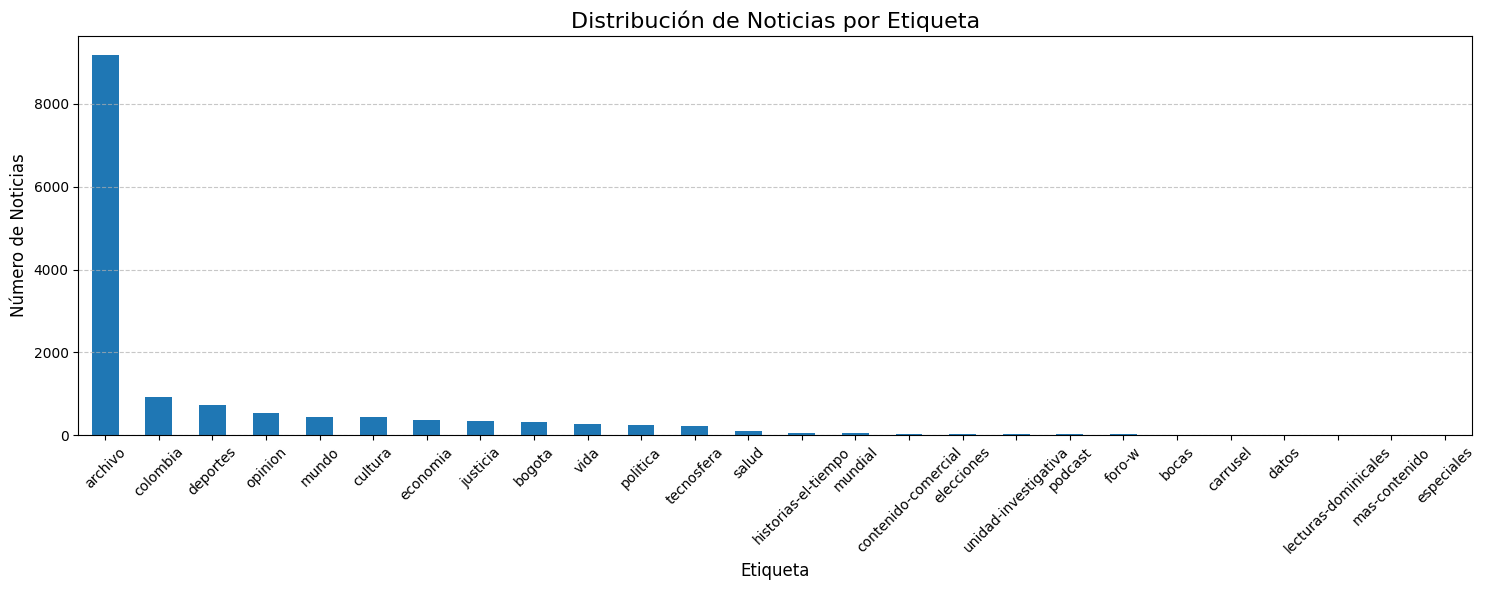

Etiqueta
archivo                 9187
colombia                 934
deportes                 727
opinion                  532
mundo                    446
cultura                  430
economia                 367
justicia                 343
bogota                   311
vida                     268
politica                 252
tecnosfera               214
salud                    106
historias-el-tiempo       57
mundial                   47
contenido-comercial       34
elecciones                33
unidad-investigativa      27
podcast                   20
foro-w                    18
bocas                     15
carrusel                   8
datos                      7
lecturas-dominicales       6
mas-contenido              4
especiales                 3
Name: count, dtype: int64

In [71]:
# Calcular la distribución de la columna 'Etiqueta'
etiqueta_distribution = data['Etiqueta'].value_counts()

# Graficar la distribución como un gráfico de barras
plt.figure(figsize=(15, 6))  # Configurar el tamaño de la figura
etiqueta_distribution.plot(kind='bar')  # Crear el gráfico de barras
plt.title('Distribución de Noticias por Etiqueta', fontsize=16)  # Título del gráfico
plt.xlabel('Etiqueta', fontsize=12)  # Etiqueta del eje X
plt.ylabel('Número de Noticias', fontsize=12)  # Etiqueta del eje Y
plt.xticks(rotation=45, fontsize=10)  # Rotar etiquetas del eje X para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir una cuadrícula para el eje Y
plt.tight_layout()  # Ajustar automáticamente el diseño para evitar solapamientos
plt.show()  # Mostrar el gráfico

# Mostrar los conteos de noticias por etiqueta
etiqueta_distribution

Etiqueta dominante: La etiqueta "archivo" tiene una cantidad significativamente mayor de noticias en comparación con cualquier otra categoría. Esto indica que la mayoría del contenido en el dataset pertenece a esta etiqueta.

Categorías secundarias: Las etiquetas como "colombia", "deportes", y "opinion" son las más frecuentes después de "archivo", pero están mucho menos representadas, mostrando una gran disparidad en la distribución.

Otras: Hay muchas etiquetas con pocas noticias asociadas (frecuencia baja), lo que sugiere que el contenido está concentrado en unas pocas categorías principales.

Categorías relevantes (deportes, cultura, economía, justicia):

Estas categorías tienen una representación significativa, aunque menor en comparación con "archivo".
Son temas especializados que permiten realizar análisis más específicos, como la identificación de patrones dentro de áreas temáticas (deportes) o el análisis económico basado en contenido de noticias.

## Ejercicio 2

Filtrado de Datos

Objetivo: Limitar el conjunto de datos a las categorías relevantes para garantizar que el modelo se entrene y evalúe en temas especializados.

Acciones:

Excluir las noticias que pertenecen a la categoría "archivo" y cualquier otra que no esté en las categorías de deportes, cultura, economía y justicia.

Asegurarse de que el conjunto de datos resultante tenga una distribución equilibrada para estas categorías, en la medida de lo posible.

Contexto: Es importante filtrar los datos para enfocarnos en temas especializados porque algunas categorías pueden tener un discurso amplio y no se tratan de un tema especializado. Esto ayuda a mejorar la precisión del modelo al enfocarse en categorías bien definidas.

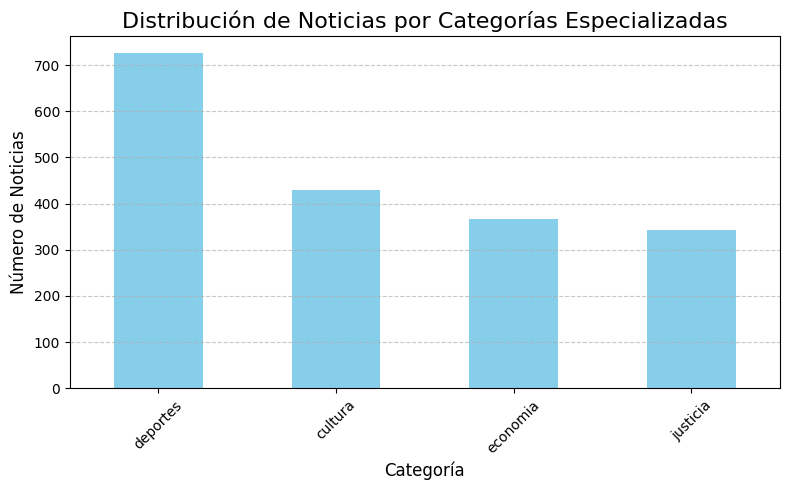

In [72]:
# Filtrar noticias por categorías relevantes excluyendo "archivo" y otras irrelevantes
categorias_relevantes = ['deportes', 'cultura', 'economia', 'justicia']
datos_filtrados = data[data['Etiqueta'].isin(categorias_relevantes)]

# Verificar la distribución de las categorías filtradas
distribucion_filtrada = datos_filtrados['Etiqueta'].value_counts()

# Visualizar la distribución de las categorías filtradas
plt.figure(figsize=(8, 5))
distribucion_filtrada.plot(kind='bar', color='skyblue')
plt.title('Distribución de Noticias por Categorías Especializadas', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Número de Noticias', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




In [73]:
datos_filtrados

,Columna1,Enlaces,Título,info,contenido,Etiqueta
10487,10487,https://www.eltiempo.com/cultura/al-interior-d...,"Al interior de, aparte, roquero, rock / El len...",'Al interior de' es el reemplazo sofisticado e...,Citas: “Los crímenes de violencia sexual comet...,cultura
10488,10488,https://www.eltiempo.com/cultura/arte-y-teatro...,Antonina Canal: 20 años de danza oriental en C...,La bailarina habló con EL TIEMPO de su trayect...,Con motivo de la celebración de los 20 años de...,cultura
10489,10489,https://www.eltiempo.com/cultura/arte-y-teatro...,"Aparece en Holanda cuadro de Picasso, robado h...","La pintura era propiedad de un jeque saudí, Ab...","El cuadro Busto de mujer, del artista español ...",cultura
10490,10490,https://www.eltiempo.com/cultura/arte-y-teatro...,Así será la programación del Carnaval de las A...,El evento con algunos de los artistas más repr...,"El Carnaval de las Artes, organizado en Barran...",cultura
10491,10491,https://www.eltiempo.com/cultura/arte-y-teatro...,‘Fragmentos’ se viste de charlas y música,El lugar donde está el monumento de la artista...,"Louise du Toit, filósofa; el doctor Denis Mukw...",cultura
...,...,...,...,...,...,...
12467,12467,https://www.eltiempo.com/justicia/servicios/po...,Más de 70 mil policías apoyan jornada de aisla...,Miisterio de Defensa activó dispositivo especi...,"El ministro de la Defensa, Carlos Holmes Truj...",justicia
12468,12468,https://www.eltiempo.com/justicia/servicios/pr...,Habrá proyecto conjunto para superar la crisis...,Se revisarán “conductas antisociales” que se h...,Después de varios contrapunteos sobre la mejor...,justicia
12469,12469,https://www.eltiempo.com/justicia/servicios/qu...,¿Qué hacer en caso de un accidente de tránsito...,EL TIEMPO y la Unilibre responden a esta y otr...,El TIempo y la Universidad Libre se aliaron pa...,justicia
12470,12470,https://www.eltiempo.com/justicia/servicios/su...,Otorgan subsidios a tres obreros del edificio ...,También la esposa de una de las víctimas recib...,Tres trabajadores del edificio Portales Blas d...,justicia


### Asegurarse de que el conjunto de datos resultante tenga una distribución equilibrada para estas categorías, en la medida de lo posible.

Submuestreo: Si las categorías tienen diferentes cantidades de datos, se toma la misma cantidad que la categoría con menos datos, eliminando registros sobrantes de las categorías más grandes.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26084\264665382.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min_count, random_state=42))


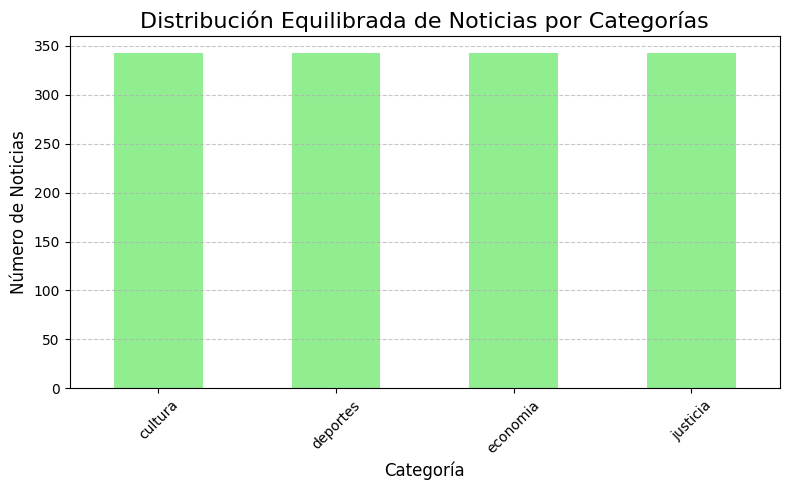

Etiqueta
cultura     343
deportes    343
economia    343
justicia    343
Name: count, dtype: int64


In [75]:
# Identificar el tamaño mínimo entre las categorías
min_count = datos_filtrados['Etiqueta'].value_counts().min()

# Submuestrear cada categoría para que todas tengan la misma cantidad de datos
datos_balanceados = (
    datos_filtrados.groupby('Etiqueta', group_keys=False)
    .apply(lambda x: x.sample(min_count, random_state=42))
    .reset_index(drop=True)
)

# Verificar la nueva distribución equilibrada
distribucion_balanceada = datos_balanceados['Etiqueta'].value_counts()

# Visualizar la distribución equilibrada
plt.figure(figsize=(8, 5))
distribucion_balanceada.plot(kind='bar', color='lightgreen')
plt.title('Distribución Equilibrada de Noticias por Categorías', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Número de Noticias', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrar la nueva distribución en la consola
print(distribucion_balanceada)


In [76]:
datos_filtrados

,Columna1,Enlaces,Título,info,contenido,Etiqueta
10487,10487,https://www.eltiempo.com/cultura/al-interior-d...,"Al interior de, aparte, roquero, rock / El len...",'Al interior de' es el reemplazo sofisticado e...,Citas: “Los crímenes de violencia sexual comet...,cultura
10488,10488,https://www.eltiempo.com/cultura/arte-y-teatro...,Antonina Canal: 20 años de danza oriental en C...,La bailarina habló con EL TIEMPO de su trayect...,Con motivo de la celebración de los 20 años de...,cultura
10489,10489,https://www.eltiempo.com/cultura/arte-y-teatro...,"Aparece en Holanda cuadro de Picasso, robado h...","La pintura era propiedad de un jeque saudí, Ab...","El cuadro Busto de mujer, del artista español ...",cultura
10490,10490,https://www.eltiempo.com/cultura/arte-y-teatro...,Así será la programación del Carnaval de las A...,El evento con algunos de los artistas más repr...,"El Carnaval de las Artes, organizado en Barran...",cultura
10491,10491,https://www.eltiempo.com/cultura/arte-y-teatro...,‘Fragmentos’ se viste de charlas y música,El lugar donde está el monumento de la artista...,"Louise du Toit, filósofa; el doctor Denis Mukw...",cultura
...,...,...,...,...,...,...
12467,12467,https://www.eltiempo.com/justicia/servicios/po...,Más de 70 mil policías apoyan jornada de aisla...,Miisterio de Defensa activó dispositivo especi...,"El ministro de la Defensa, Carlos Holmes Truj...",justicia
12468,12468,https://www.eltiempo.com/justicia/servicios/pr...,Habrá proyecto conjunto para superar la crisis...,Se revisarán “conductas antisociales” que se h...,Después de varios contrapunteos sobre la mejor...,justicia
12469,12469,https://www.eltiempo.com/justicia/servicios/qu...,¿Qué hacer en caso de un accidente de tránsito...,EL TIEMPO y la Unilibre responden a esta y otr...,El TIempo y la Universidad Libre se aliaron pa...,justicia
12470,12470,https://www.eltiempo.com/justicia/servicios/su...,Otorgan subsidios a tres obreros del edificio ...,También la esposa de una de las víctimas recib...,Tres trabajadores del edificio Portales Blas d...,justicia


In [77]:
datos_balanceados

,Columna1,Enlaces,Título,info,contenido,Etiqueta
0,10909,https://www.eltiempo.com/cultura/musica-y-libr...,"Luis Miguel, 50 años de un sol sin ocaso",'El Sol de México' cumple 50 años. Su historia...,"Siendo un niño, ‘El Sol de México’ se convirti...",cultura
1,10562,https://www.eltiempo.com/cultura/cine-y-tv/cri...,Críticamente: Aquí y ahora,Las películas de Víctor Gaviria constituyen un...,Las películas de Víctor Gaviria constituyen un...,cultura
2,10664,https://www.eltiempo.com/cultura/gastronomia/c...,Mejor con chimichurri / El Caldero,¿Dónde encontrar esa buena salsa para aderezar...,"Del inagotable repertorio de las salsas, no cr...",cultura
3,10517,https://www.eltiempo.com/cultura/arte-y-teatro...,Secretos coloniales de la Casa 1537 de Cartagena,"Este sitio, que fue catedral, colegio y hospit...","La Casa 1537, ubicada en la calle del Colegio ...",cultura
4,10848,https://www.eltiempo.com/cultura/musica-y-libr...,"Judas Priest, Helloween y Kreator estarán en e...",El festival será el 26 de octubre en el Hipódr...,"Judas Priest, la banda británica fundamental e...",cultura
...,...,...,...,...,...,...
1367,12317,https://www.eltiempo.com/justicia/investigacio...,Llamado a interrogatorio por Hidroituango es e...,"Álvaro Villegas Moreno, citado por la Fiscalía...",Dentro de los llamados a a declarar por la Fi...,justicia
1368,12200,https://www.eltiempo.com/justicia/cortes/conse...,Consejo de Estado negó demanda por $ 4 mil mil...,Los demandantes aludían afectación patrimonial...,Cuatro comisionistas de bolsa que laboraron en...,justicia
1369,12235,https://www.eltiempo.com/justicia/cortes/proye...,Con cooperación internacional mejorarán educac...,Proyecto de cooperación con EE. UU. fortalecer...,Con el apoyo de la Embajada de los Estados Uni...,justicia
1370,12399,https://www.eltiempo.com/justicia/investigacio...,Las claves de la histórica jornada electoral d...,La mayor participación obedece a los efectos d...,Como ha sido la constante desde el 2002 –con l...,justicia


## Ejercicio 3

Preprocesamiento de Texto

Objetivo: Preparar los datos textuales para el entrenamiento del modelo.

Acciones:

Convertir todo el texto a minúsculas para uniformidad.

Eliminar puntuación y números para reducir el ruido en los datos.

Eliminar palabras comunes (stop words) que no aportan significado específico al análisis.

Tokenizar el texto, es decir, dividir el texto en palabras individuales.

Aplicar padding a las secuencias de palabras para que todas tengan la misma longitud, facilitando el procesamiento por las redes neuronales.

### Paso 1: Preprocesamiento del Texto

En este paso, transformaremos el texto a minúsculas, eliminaremos la puntuación, los números y los espacios en blanco adicionales.

In [79]:
# Función para preprocesar texto
def preprocess_text(text):
    """
    Esta función realiza el preprocesamiento del texto.
    1. Convierte el texto a minúsculas.
    2. Elimina la puntuación.
    3. Elimina los números.
    4. Elimina los espacios en blanco adicionales.
    5. Elimina comilla simple (preguntar la profe si se deja esta funcionalidad jcc)

    Parámetros:
    text (str): El texto original.

    Retorna:
    str: El texto preprocesado.
    """
    #Eliminar comillas simple  ‘
    text = text.translate(str.maketrans('', '', "‘"))
     #Eliminar comillas simple  ’
    text = text.translate(str.maketrans('', '', "’"))
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar números
    text = re.sub(r'\d+', '', text)
    # Eliminar espacios en blanco adicionales
    text = text.strip()
    return text

# Aplicar preprocesamiento al contenido
## Deben eliminarse los valores nulos antes de aplicar el preprocesamiento
datos_balanceados = datos_balanceados.dropna(subset=['contenido'])

# Aplicar preprocesamiento al contenido
datos_balanceados['contenido_preprocesado'] = datos_balanceados['contenido'].apply(preprocess_text)

# Mostrar una vista previa de los datos preprocesados
display(datos_balanceados[['contenido', 'contenido_preprocesado']].head())

# Dimensiones de los datos

print(f'Dimensiones de los datos: {datos_balanceados.shape}')

,contenido,contenido_preprocesado
0,"Siendo un niño, ‘El Sol de México’ se convirti...",siendo un niño el sol de méxico se convirtió e...
1,Las películas de Víctor Gaviria constituyen un...,las películas de víctor gaviria constituyen un...
2,"Del inagotable repertorio de las salsas, no cr...",del inagotable repertorio de las salsas no cre...
3,"La Casa 1537, ubicada en la calle del Colegio ...",la casa ubicada en la calle del colegio del c...
4,"Judas Priest, la banda británica fundamental e...",judas priest la banda británica fundamental en...


Dimensiones de los datos: (1371, 7)


In [80]:
# Se visualizan todas las columnas del data set
datos_balanceados

,Columna1,Enlaces,Título,info,contenido,Etiqueta,contenido_preprocesado
0,10909,https://www.eltiempo.com/cultura/musica-y-libr...,"Luis Miguel, 50 años de un sol sin ocaso",'El Sol de México' cumple 50 años. Su historia...,"Siendo un niño, ‘El Sol de México’ se convirti...",cultura,siendo un niño el sol de méxico se convirtió e...
1,10562,https://www.eltiempo.com/cultura/cine-y-tv/cri...,Críticamente: Aquí y ahora,Las películas de Víctor Gaviria constituyen un...,Las películas de Víctor Gaviria constituyen un...,cultura,las películas de víctor gaviria constituyen un...
2,10664,https://www.eltiempo.com/cultura/gastronomia/c...,Mejor con chimichurri / El Caldero,¿Dónde encontrar esa buena salsa para aderezar...,"Del inagotable repertorio de las salsas, no cr...",cultura,del inagotable repertorio de las salsas no cre...
3,10517,https://www.eltiempo.com/cultura/arte-y-teatro...,Secretos coloniales de la Casa 1537 de Cartagena,"Este sitio, que fue catedral, colegio y hospit...","La Casa 1537, ubicada en la calle del Colegio ...",cultura,la casa ubicada en la calle del colegio del c...
4,10848,https://www.eltiempo.com/cultura/musica-y-libr...,"Judas Priest, Helloween y Kreator estarán en e...",El festival será el 26 de octubre en el Hipódr...,"Judas Priest, la banda británica fundamental e...",cultura,judas priest la banda británica fundamental en...
...,...,...,...,...,...,...,...
1367,12317,https://www.eltiempo.com/justicia/investigacio...,Llamado a interrogatorio por Hidroituango es e...,"Álvaro Villegas Moreno, citado por la Fiscalía...",Dentro de los llamados a a declarar por la Fi...,justicia,dentro de los llamados a a declarar por la fi...
1368,12200,https://www.eltiempo.com/justicia/cortes/conse...,Consejo de Estado negó demanda por $ 4 mil mil...,Los demandantes aludían afectación patrimonial...,Cuatro comisionistas de bolsa que laboraron en...,justicia,cuatro comisionistas de bolsa que laboraron en...
1369,12235,https://www.eltiempo.com/justicia/cortes/proye...,Con cooperación internacional mejorarán educac...,Proyecto de cooperación con EE. UU. fortalecer...,Con el apoyo de la Embajada de los Estados Uni...,justicia,con el apoyo de la embajada de los estados uni...
1370,12399,https://www.eltiempo.com/justicia/investigacio...,Las claves de la histórica jornada electoral d...,La mayor participación obedece a los efectos d...,Como ha sido la constante desde el 2002 –con l...,justicia,como ha sido la constante desde el –con la so...


### Tokenizar el texto, es decir, dividir el texto en palabras individuales.

In [81]:
# Tokenización
datos_balanceados['tokens'] = datos_balanceados['contenido_preprocesado'].apply(word_tokenize)

# Mostrar una vista previa de los tokens
datos_balanceados[['contenido_preprocesado', 'tokens']].head()

,contenido_preprocesado,tokens
0,siendo un niño el sol de méxico se convirtió e...,"[siendo, un, niño, el, sol, de, méxico, se, co..."
1,las películas de víctor gaviria constituyen un...,"[las, películas, de, víctor, gaviria, constitu..."
2,del inagotable repertorio de las salsas no cre...,"[del, inagotable, repertorio, de, las, salsas,..."
3,la casa ubicada en la calle del colegio del c...,"[la, casa, ubicada, en, la, calle, del, colegi..."
4,judas priest la banda británica fundamental en...,"[judas, priest, la, banda, británica, fundamen..."


In [83]:
## Revise los tokens para asegurarse de que el texto se haya tokenizado correctamente

print("Contenido preprocesado: ", datos_balanceados['contenido_preprocesado'][0])
print("Tokens: ", datos_balanceados['tokens'][0])

Contenido preprocesado:  siendo un niño el sol de méxico se convirtió en un auténtico fenómeno en méxico que pronto arrasó en toda latinoamérica marcando a generaciones enteras  una estrella que luego de años de bache en su carrera regresó a la popularidad gracias a la serie basada en su vida empezó a cantar con apenas diez años y pronto se convirtió en todo un fenómeno en méxico y en una de las grandes voces de la canción romántica tanto es así que aún no había cumplido quince años cuando recibió su primer grammy  por la canción me gustas tal como eres que interpretó a dúo con la escocesa sheena easton hoy tras cuatro décadas de carrera sigue siendo uno de los grandes representantes de la música mexicana y latina en el mundo “muy temprano luis miguel deja de ser un niño para ser un trabajador y uno sometido a una disciplina muy tenaz y claro eso le ha marcado su vida completamente en los aspectos positivos como desarrollar una carrera sólida tanto en los negativos como haberse visto p

In [84]:
datos_balanceados

,Columna1,Enlaces,Título,info,contenido,Etiqueta,contenido_preprocesado,tokens
0,10909,https://www.eltiempo.com/cultura/musica-y-libr...,"Luis Miguel, 50 años de un sol sin ocaso",'El Sol de México' cumple 50 años. Su historia...,"Siendo un niño, ‘El Sol de México’ se convirti...",cultura,siendo un niño el sol de méxico se convirtió e...,"[siendo, un, niño, el, sol, de, méxico, se, co..."
1,10562,https://www.eltiempo.com/cultura/cine-y-tv/cri...,Críticamente: Aquí y ahora,Las películas de Víctor Gaviria constituyen un...,Las películas de Víctor Gaviria constituyen un...,cultura,las películas de víctor gaviria constituyen un...,"[las, películas, de, víctor, gaviria, constitu..."
2,10664,https://www.eltiempo.com/cultura/gastronomia/c...,Mejor con chimichurri / El Caldero,¿Dónde encontrar esa buena salsa para aderezar...,"Del inagotable repertorio de las salsas, no cr...",cultura,del inagotable repertorio de las salsas no cre...,"[del, inagotable, repertorio, de, las, salsas,..."
3,10517,https://www.eltiempo.com/cultura/arte-y-teatro...,Secretos coloniales de la Casa 1537 de Cartagena,"Este sitio, que fue catedral, colegio y hospit...","La Casa 1537, ubicada en la calle del Colegio ...",cultura,la casa ubicada en la calle del colegio del c...,"[la, casa, ubicada, en, la, calle, del, colegi..."
4,10848,https://www.eltiempo.com/cultura/musica-y-libr...,"Judas Priest, Helloween y Kreator estarán en e...",El festival será el 26 de octubre en el Hipódr...,"Judas Priest, la banda británica fundamental e...",cultura,judas priest la banda británica fundamental en...,"[judas, priest, la, banda, británica, fundamen..."
...,...,...,...,...,...,...,...,...
1367,12317,https://www.eltiempo.com/justicia/investigacio...,Llamado a interrogatorio por Hidroituango es e...,"Álvaro Villegas Moreno, citado por la Fiscalía...",Dentro de los llamados a a declarar por la Fi...,justicia,dentro de los llamados a a declarar por la fi...,"[dentro, de, los, llamados, a, a, declarar, po..."
1368,12200,https://www.eltiempo.com/justicia/cortes/conse...,Consejo de Estado negó demanda por $ 4 mil mil...,Los demandantes aludían afectación patrimonial...,Cuatro comisionistas de bolsa que laboraron en...,justicia,cuatro comisionistas de bolsa que laboraron en...,"[cuatro, comisionistas, de, bolsa, que, labora..."
1369,12235,https://www.eltiempo.com/justicia/cortes/proye...,Con cooperación internacional mejorarán educac...,Proyecto de cooperación con EE. UU. fortalecer...,Con el apoyo de la Embajada de los Estados Uni...,justicia,con el apoyo de la embajada de los estados uni...,"[con, el, apoyo, de, la, embajada, de, los, es..."
1370,12399,https://www.eltiempo.com/justicia/investigacio...,Las claves de la histórica jornada electoral d...,La mayor participación obedece a los efectos d...,Como ha sido la constante desde el 2002 –con l...,justicia,como ha sido la constante desde el –con la so...,"[como, ha, sido, la, constante, desde, el, –co..."


### Eliminar palabras comunes (stop words) que no aportan significado específico al análisis.

In [85]:
# Eliminar stop words
stop_words = set(stopwords.words('spanish'))
datos_balanceados['tokens_sin_stopwords'] = datos_balanceados['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Mostrar una vista previa de los tokens sin stop words
datos_balanceados[['tokens', 'tokens_sin_stopwords']].head()

,tokens,tokens_sin_stopwords
0,"[siendo, un, niño, el, sol, de, méxico, se, co...","[siendo, niño, sol, méxico, convirtió, auténti..."
1,"[las, películas, de, víctor, gaviria, constitu...","[películas, víctor, gaviria, constituyen, capí..."
2,"[del, inagotable, repertorio, de, las, salsas,...","[inagotable, repertorio, salsas, creo, recorda..."
3,"[la, casa, ubicada, en, la, calle, del, colegi...","[casa, ubicada, calle, colegio, centro, histór..."
4,"[judas, priest, la, banda, británica, fundamen...","[judas, priest, banda, británica, fundamental,..."


In [86]:
datos_balanceados.head()

,Columna1,Enlaces,Título,info,contenido,Etiqueta,contenido_preprocesado,tokens,tokens_sin_stopwords
0,10909,https://www.eltiempo.com/cultura/musica-y-libr...,"Luis Miguel, 50 años de un sol sin ocaso",'El Sol de México' cumple 50 años. Su historia...,"Siendo un niño, ‘El Sol de México’ se convirti...",cultura,siendo un niño el sol de méxico se convirtió e...,"[siendo, un, niño, el, sol, de, méxico, se, co...","[siendo, niño, sol, méxico, convirtió, auténti..."
1,10562,https://www.eltiempo.com/cultura/cine-y-tv/cri...,Críticamente: Aquí y ahora,Las películas de Víctor Gaviria constituyen un...,Las películas de Víctor Gaviria constituyen un...,cultura,las películas de víctor gaviria constituyen un...,"[las, películas, de, víctor, gaviria, constitu...","[películas, víctor, gaviria, constituyen, capí..."
2,10664,https://www.eltiempo.com/cultura/gastronomia/c...,Mejor con chimichurri / El Caldero,¿Dónde encontrar esa buena salsa para aderezar...,"Del inagotable repertorio de las salsas, no cr...",cultura,del inagotable repertorio de las salsas no cre...,"[del, inagotable, repertorio, de, las, salsas,...","[inagotable, repertorio, salsas, creo, recorda..."
3,10517,https://www.eltiempo.com/cultura/arte-y-teatro...,Secretos coloniales de la Casa 1537 de Cartagena,"Este sitio, que fue catedral, colegio y hospit...","La Casa 1537, ubicada en la calle del Colegio ...",cultura,la casa ubicada en la calle del colegio del c...,"[la, casa, ubicada, en, la, calle, del, colegi...","[casa, ubicada, calle, colegio, centro, histór..."
4,10848,https://www.eltiempo.com/cultura/musica-y-libr...,"Judas Priest, Helloween y Kreator estarán en e...",El festival será el 26 de octubre en el Hipódr...,"Judas Priest, la banda británica fundamental e...",cultura,judas priest la banda británica fundamental en...,"[judas, priest, la, banda, británica, fundamen...","[judas, priest, banda, británica, fundamental,..."


### Aplicar padding a las secuencias de palabras para que todas tengan la misma longitud, facilitando el procesamiento por las redes neuronales.

#### con esta aplicacion de padding no se garega columna al data set y se guarda en una variable llamda padded_sequences, asi la tien el profe en ela guia 2. mirar si se da asi o como aplciada anterisomente que agrega dos columnas la data set
ojo: revise y el profe la deja asi para usar la varaible para la divion de datos.

In [108]:
# con esta aplicacion de padding no se garega columna al data set y se guarda en una variable llamda padded_sequences, asi la tien el profe en ela guia 2. mirar si se da asi o como aplciada anterisomente que agrega dos columnas la data set
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Paso 1: Crear el tokenizador y ajustarlo a las palabras de tokens_sin_stopwords
tokenizer = Tokenizer()
tokenizer.fit_on_texts(datos_balanceados['tokens_sin_stopwords'])

# Extraer el vocabulario generado (word_index)
word_index = tokenizer.word_index
#print(f"Vocabulario generado (word_index): {word_index}")

# Paso 2: Convertir las palabras a índices numéricos
sequences = tokenizer.texts_to_sequences(datos_balanceados['tokens_sin_stopwords'])

# Paso 3: Aplicar padding y guardar en la variable padded_sequences
max_len = 150  # Longitud máxima para el padding 
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Mostrar los resultados
print(padded_sequences[:5])  # Muestra las primeras 5 secuencias con padding


[[ 7117 11432   744   592 23573 11434  2283 23574  4959  5250 13647   103
     70    73 11435   218   346   986    59 13648  1052 17075   109   234
   1512  4424  1052  2435 23575   776  5251     7   112   454  6027  1260
    971  1407  1408  1325  1191   972   443     4  8766   585 13649  1326
   9898  5603     7   401   264    56  1614  2085 17082     3  2436   229
     53   132  1279   941   229  1134   425   112   454    76   272  2362
  23576   784  7123   899  4960   241  3115  8767  5607    71   326  4961
    542  1071   302  1476   119    88   192   150   998   179   714   586
   7124    22     1    48    28    14    43    36    45    37    17    29
     40    23     7    21     6     1    31    30    38    25    26    44
     41     2    11    24    49     6     1    33     9    27    19     8
     46    12     2     1    34    39    32    13     5    18     1    42
     10    15    16    47     5    35]
 [  986  1161 17087    23   115  3821   117  3674  1544  5254  4425 13653

In [109]:
print(f"Vocabulario generado (word_index): {word_index}")

Vocabulario generado (word_index): {'pm': 1, 'colombia': 2, '”': 3, '“': 4, 'valle': 5, 'manizales': 6, 'vida': 7, 'casos': 8, 'salud': 9, 'cerca': 10, 'posible': 11, 'coronavirus': 12, 'barranquilla': 13, 'cuarentena': 14, 'mil': 15, 'mercados': 16, 'prueba': 17, 'cauca': 18, 'pueblo': 19, 'años': 20, 'par': 21, 'miedo': 22, 'colegio': 23, 'acceder': 24, 'fórmula': 25, 'médica': 26, 'mental': 27, 'mente': 28, 'clases': 29, 'medicamentos': 30, 'venden': 31, 'manual': 32, 'guía': 33, 'cabina': 34, 'solidario': 35, 'lógica': 36, 'ponga': 37, 'cannabis': 38, 'desinfección': 39, 'matemáticas': 40, 'especializadas': 41, 'recogido': 42, 'test': 43, 'farmacias': 44, 'matemática': 45, 'bipolaridad': 46, 'donatón': 47, 'ejercite': 48, 'medicamen': 49, 'ciento': 50, 'si': 51, 'dos': 52, 'año': 53, 'tiempo': 54, 'país': 55, 'ser': 56, 'millones': 57, 'parte': 58, 'solo': 59, 'según': 60, 'además': 61, 'así': 62, 'dijo': 63, 'puede': 64, 'personas': 65, 'pesos': 66, 'hace': 67, 'hacer': 68, 'tres'

In [110]:
datos_balanceados.head()

,Columna1,Enlaces,Título,info,contenido,Etiqueta,contenido_preprocesado,tokens,tokens_sin_stopwords,Etiqueta_codificada
0,10909,https://www.eltiempo.com/cultura/musica-y-libr...,"Luis Miguel, 50 años de un sol sin ocaso",'El Sol de México' cumple 50 años. Su historia...,"Siendo un niño, ‘El Sol de México’ se convirti...",cultura,siendo un niño el sol de méxico se convirtió e...,"[siendo, un, niño, el, sol, de, méxico, se, co...","[siendo, niño, sol, méxico, convirtió, auténti...",0
1,10562,https://www.eltiempo.com/cultura/cine-y-tv/cri...,Críticamente: Aquí y ahora,Las películas de Víctor Gaviria constituyen un...,Las películas de Víctor Gaviria constituyen un...,cultura,las películas de víctor gaviria constituyen un...,"[las, películas, de, víctor, gaviria, constitu...","[películas, víctor, gaviria, constituyen, capí...",0
2,10664,https://www.eltiempo.com/cultura/gastronomia/c...,Mejor con chimichurri / El Caldero,¿Dónde encontrar esa buena salsa para aderezar...,"Del inagotable repertorio de las salsas, no cr...",cultura,del inagotable repertorio de las salsas no cre...,"[del, inagotable, repertorio, de, las, salsas,...","[inagotable, repertorio, salsas, creo, recorda...",0
3,10517,https://www.eltiempo.com/cultura/arte-y-teatro...,Secretos coloniales de la Casa 1537 de Cartagena,"Este sitio, que fue catedral, colegio y hospit...","La Casa 1537, ubicada en la calle del Colegio ...",cultura,la casa ubicada en la calle del colegio del c...,"[la, casa, ubicada, en, la, calle, del, colegi...","[casa, ubicada, calle, colegio, centro, histór...",0
4,10848,https://www.eltiempo.com/cultura/musica-y-libr...,"Judas Priest, Helloween y Kreator estarán en e...",El festival será el 26 de octubre en el Hipódr...,"Judas Priest, la banda británica fundamental e...",cultura,judas priest la banda británica fundamental en...,"[judas, priest, la, banda, británica, fundamen...","[judas, priest, banda, británica, fundamental,...",0


## Ejercicio 4

División del Conjunto de Datos

Objetivo: Crear conjuntos de datos de entrenamiento y validación para evaluar el modelo.

Acciones:

Dividir el conjunto de datos preprocesado en dos partes: uno para entrenar el modelo y otro para validarlo.

Asegurarse de que la división sea aleatoria, pero que mantenga una proporción similar de las categorías en ambos conjuntos.

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Paso 1: Codificación de etiquetas
label_encoder = LabelEncoder()
datos_balanceados['Etiqueta_codificada'] = label_encoder.fit_transform(datos_balanceados['Etiqueta'])

# Paso 3: División del conjunto de datos
X_train, X_val, y_train, y_val = train_test_split(
    padded_sequences, 
    datos_balanceados['Etiqueta_codificada'], 
    test_size=0.2, 
    random_state=42, #Division aleatoria
    stratify=datos_balanceados['Etiqueta_codificada']  # Mantener proporciones
)

# Mostrar tamaño de los conjuntos de datos
print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de validación: {len(X_val)}")


Tamaño del conjunto de entrenamiento: 1096
Tamaño del conjunto de validación: 275


In [112]:
datos_balanceados['Etiqueta_codificada'].value_counts()

Etiqueta_codificada
1    343
2    343
3    343
0    342
Name: count, dtype: int64

## Ejercicio 5

Implementación de un Modelo RNN

Objetivo: Construir y entrenar un modelo RNN para clasificar las noticias.

Acciones:

Definir la arquitectura del modelo RNN, incluyendo capas de embedding y capas recurrentes.

Configurar los hiperparámetros del modelo, como el tamaño del embedding y el número de unidades recurrentes.

Entrenar el modelo utilizando el conjunto de datos de entrenamiento y evaluar su rendimiento en el conjunto de validación.

Epoch 1/20


c:\Users\Lenovo\anaconda3\envs\nlp_proyecto_final\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.2743 - loss: 1.4425 - val_accuracy: 0.2618 - val_loss: 1.4115
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.2676 - loss: 1.3869 - val_accuracy: 0.2509 - val_loss: 1.4159
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.2771 - loss: 1.3843 - val_accuracy: 0.2618 - val_loss: 1.4000
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.3081 - loss: 1.3657 - val_accuracy: 0.2582 - val_loss: 1.4198
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.2991 - loss: 1.3754 - val_accuracy: 0.2618 - val_loss: 1.4219
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.3456 - loss: 1.3813 - val_accuracy: 0.2145 - val_loss: 1.4498
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.2852 - loss: 1.3932 - val_accuracy: 0.3164 - val_loss: 1.3993
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.2844 - loss: 1.3928 - val_accuracy: 0.2618 - val_loss: 

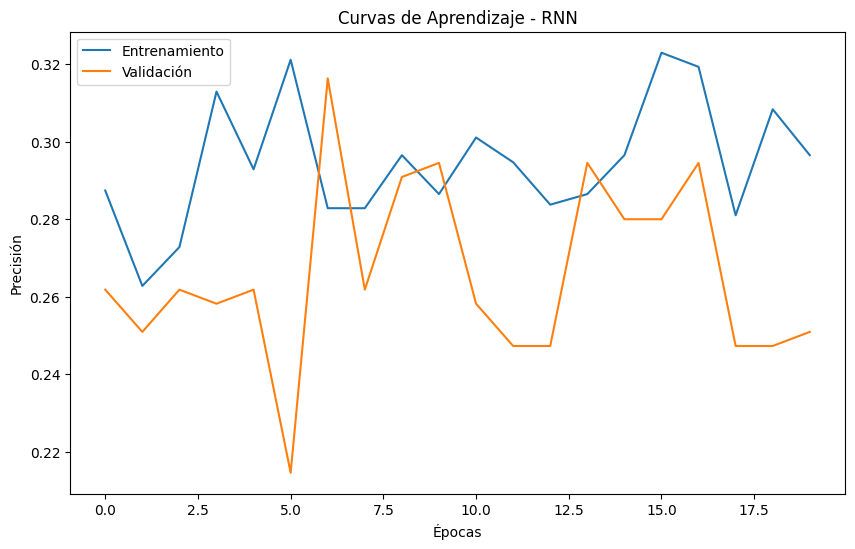

In [113]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt


# Definir hiperparámetros
vocab_size = len(word_index) + 1  # Tamaño del vocabulario
embedding_dim = 256  # Dimensión de los vectores de embedding
rnn_units = 128  # Unidades de la capa recurrente
#output_classes = len(label_encoder.classes_)  # Número de categorías
output_classes = len(categorias_relevantes)  # Número de categorías 

# Construcción del modelo RNN
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=X_train.shape[1]))
model_rnn.add(SimpleRNN(units=rnn_units, return_sequences=False))
#model_rnn.add(Dropout(0.5))  # Regularización
model_rnn.add(Dense(units=output_classes, activation='softmax'))

# Compilación del modelo
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32) # epochs= epocas

# Visualización de resultados del modelo RNN
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['accuracy'], label='Entrenamiento')
plt.plot(history_rnn.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN')
plt.show()


Analizamos esta gráfica detalladamente y observamos un comportamiento fluctuante en la precisión tanto del conjunto de entrenamiento como del de validación. Esto indica que el modelo tiene dificultades para generalizar, mostrando picos y caídas en ambas curvas, especialmente en la validación. Notamos que, aunque la precisión del entrenamiento alcanza valores cercanos al 32%, la precisión de validación permanece más baja, con una notable inconsistencia.

Este comportamiento puede ser un síntoma de varios problemas:

Sobreajuste parcial: El modelo parece estar aprendiendo patrones específicos del conjunto de entrenamiento, pero no logra capturar características generalizables al conjunto de validación.
Inestabilidad en el aprendizaje: Los picos y caídas drásticas en las primeras épocas sugieren que el modelo podría beneficiarse de ajustes adicionales en el optimizador, como reducir aún más el learning rate.
Modelo subóptimo para los datos: Es posible que la arquitectura actual no sea la más adecuada para capturar la complejidad de las dependencias en los datos.

Recomendamos explorar arquitecturas más avanzadas, como redes con capas LSTM.

## Ejercicio 6

Implementación de un Modelo LSTM

Objetivo: Construir y entrenar un modelo LSTM para clasificar las noticias.

Acciones:

Definir la arquitectura del modelo LSTM, que incluye celdas LSTM diseñadas para manejar dependencias a largo plazo más eficientemente.

Configurar los hiperparámetros del modelo, similar al proceso del modelo RNN.

Entrenar el modelo LSTM y evaluar su rendimiento utilizando los mismos conjuntos de datos.

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.2456 - loss: 1.5134 - val_accuracy: 0.2436 - val_loss: 1.3862
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.2838 - loss: 1.4217 - val_accuracy: 0.2655 - val_loss: 1.3862
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.2673 - loss: 1.4090 - val_accuracy: 0.2618 - val_loss: 1.3859
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.2729 - loss: 1.3860 - val_accuracy: 0.2618 - val_loss: 1.3852
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.3534 - loss: 1.3476 - val_accuracy: 0.4364 - val_loss: 1.3836
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.3486 - loss: 1.3281 - val_accuracy: 0.2691 - val_loss: 1.3672
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.4596 - loss: 1.1114 - val_accuracy: 0.4655 - val_loss: 1.3341
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.5136 - loss: 1.0008 - val_accuracy: 0.

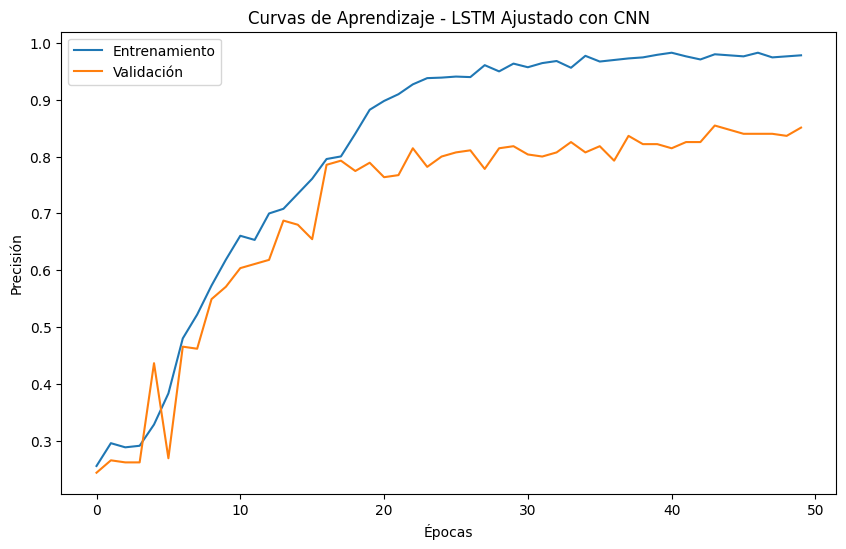

In [115]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

# Configuración
vocab_size = len(word_index) + 1
embedding_dim = 300
lstm_units = 64
output_classes = len(categorias_relevantes)

# Modelo
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model_lstm.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_lstm.add(MaxPooling1D(pool_size=2))
model_lstm.add(LSTM(units=lstm_units, dropout=0.3, recurrent_dropout=0.3))
model_lstm.add(BatchNormalization())
model_lstm.add(Dense(units=output_classes, activation='softmax'))

# Compilación
optimizer = RMSprop(learning_rate=0.0005)
model_lstm.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento con EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
history_lstm = model_lstm.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping]
)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['accuracy'], label='Entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - LSTM Ajustado con CNN')
plt.show()




Al analizar esta gráfica, observamos un notable avance en el rendimiento del modelo. La precisión tanto en entrenamiento como en validación muestra una tendencia positiva a lo largo de las 50 épocas, indicando que el modelo está aprendiendo de manera más efectiva y generalizando mejor en comparación con las iteraciones previas.

Uno de los aspectos más destacados es cómo la curva de validación logra estabilizarse en valores altos (alrededor del 80%), lo cual evidencia que los ajustes en los hiperparámetros y la arquitectura, posiblemente la combinación con CNN, han permitido al modelo captar patrones relevantes del conjunto de datos sin sobreajustarse. 

Sin embargo, notamos una ligera separación entre las curvas de entrenamiento y validación después de la época 20. Esto podría deberse a un pequeño sobreajuste, aunque no es severo. 

## Ejercicio 7

Comparación de Resultados

Objetivo: Evaluar y comparar el rendimiento de los modelos RNN y LSTM.

Acciones:

Calcular y comparar métricas de rendimiento como precisión, recall y F1-score para ambos modelos.

Visualizar las curvas de aprendizaje y los resultados de validación para entender mejor cómo se desempeñan los modelos en las tareas de clasificación.

Comparar los modelos permite entender las fortalezas y debilidades de cada enfoque, proporcionando información valiosa para elegir el modelo más adecuado para tareas específicas de clasificación de texto. Documentar estos resultados de forma asertiva en el cuaderno y en el informe.

* Calcular y comparar métricas de rendimiento como precisión, recall y F1-score para ambos modelos.

In [117]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Evaluar el modelo RNN
print("Evaluación del Modelo RNN")
y_pred_rnn = model_rnn.predict(X_val)  # Predicción del modelo RNN
y_pred_rnn_classes = np.argmax(y_pred_rnn, axis=1)  # Obtener clases predichas

# Métricas para el modelo RNN
print("\nClasificación del Modelo RNN:")
print(classification_report(y_val, y_pred_rnn_classes, digits=4))
print(f"Precisión RNN: {accuracy_score(y_val, y_pred_rnn_classes):.4f}")

# Evaluar el modelo LSTM con CNN
print("\nEvaluación del Modelo LSTM con CNN")
y_pred_lstm = model_lstm.predict(X_val)  # Predicción del modelo LSTM con CNN
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)  # Obtener clases predichas

# Métricas para el modelo LSTM con CNN
print("\nClasificación del Modelo LSTM con CNN:")
print(classification_report(y_val, y_pred_lstm_classes, digits=4))
print(f"Precisión LSTM con CNN: {accuracy_score(y_val, y_pred_lstm_classes):.4f}")


Evaluación del Modelo RNN
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Clasificación del Modelo RNN:
              precision    recall  f1-score   support

           0     0.2478    0.4118    0.3094        68
           1     0.3529    0.1739    0.2330        69
           2     0.2266    0.4203    0.2944        69
           3     0.0000    0.0000    0.0000        69

    accuracy                         0.2509       275
   macro avg     0.2068    0.2515    0.2092       275
weighted avg     0.2067    0.2509    0.2088       275

Precisión RNN: 0.2509

Evaluación del Modelo LSTM con CNN
3/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

c:\Users\Lenovo\anaconda3\envs\nlp_proyecto_final\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\anaconda3\envs\nlp_proyecto_final\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\anaconda3\envs\nlp_proyecto_final\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Clasificación del Modelo LSTM con CNN:
              precision    recall  f1-score   support

           0     0.7632    0.8529    0.8056        68
           1     0.7778    0.9130    0.8400        69
           2     0.9298    0.7681    0.8413        69
           3     1.0000    0.8841    0.9385        69

    accuracy                         0.8545       275
   macro avg     0.8677    0.8545    0.8563       275
weighted avg     0.8681    0.8545    0.8565       275

Precisión LSTM con CNN: 0.8545


### Analisis de Recal, f1-score, precision

Modelo LSTM con CNN

Precisión Global (accuracy): 85.45%. Este modelo demuestra un rendimiento significativamente superior, alcanzando una precisión considerablemente alta en comparación con el RNN.
F1-Score Promedio Ponderado: 85.65%. Esto refleja un balance general positivo entre precisión y recall para todas las clases.
Desempeño por Clase:
Clase 0: Precisión de 76.32% y un recall de 85.29%, lo que indica que el modelo clasifica adecuadamente la mayoría de los ejemplos, aunque tiene algunos falsos positivos.
Clase 3: Precisión perfecta de 100% con un recall de 88.41%, mostrando una excelente capacidad para identificar correctamente esta clase.
Macro Promedio: 85.63%. Este valor destaca que el modelo logra un desempeño balanceado entre todas las clases.

Modelo RNN

Precisión Global (accuracy): 25.09%. Este modelo muestra un rendimiento notablemente bajo en la tarea de clasificación, con una gran cantidad de errores en la predicción.
F1-Score Promedio Ponderado: 20.88%. Este valor resalta que el modelo no es capaz de manejar adecuadamente las clases, teniendo un balance muy pobre entre precisión y recall.
Desempeño por Clase:
Clase 0: Precisión de 24.78% y recall de 41.18%, lo que indica que el modelo tiene dificultades para identificar correctamente los ejemplos de esta clase.
Clase 3: Precisión y recall de 0%, indicando que el modelo no logra clasificar ejemplos de esta clase en absoluto.
Macro Promedio: 20.92%. Esto muestra que el modelo tiene un desempeño deficiente y no logra un balance entre las clases.

* Visualizar las curvas de aprendizaje y los resultados de validación para entender mejor cómo se desempeñan los modelos en las tareas de clasificación.

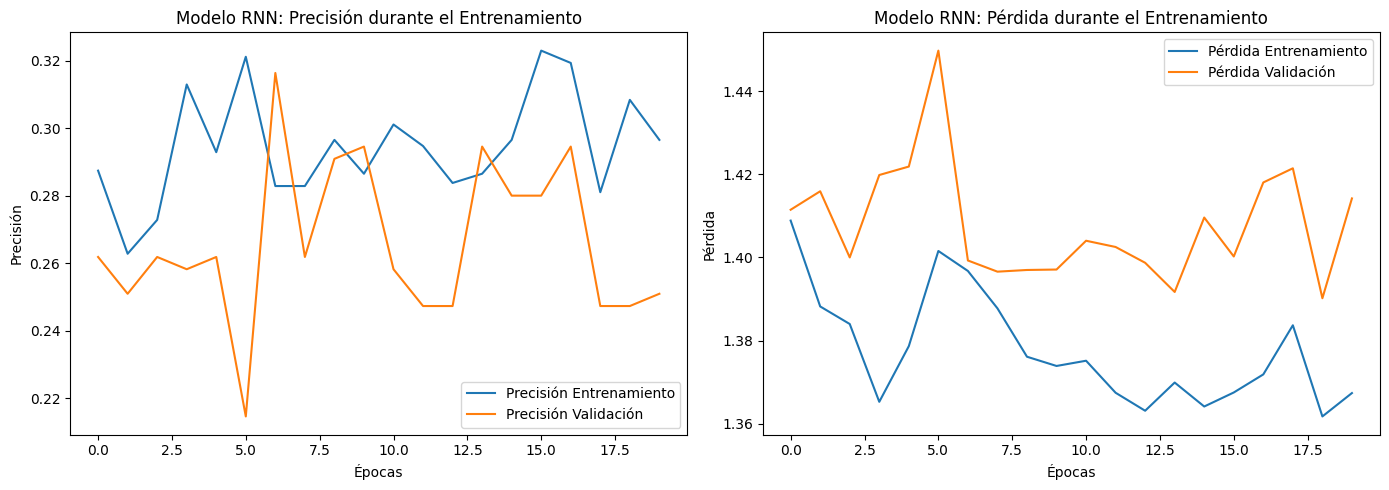

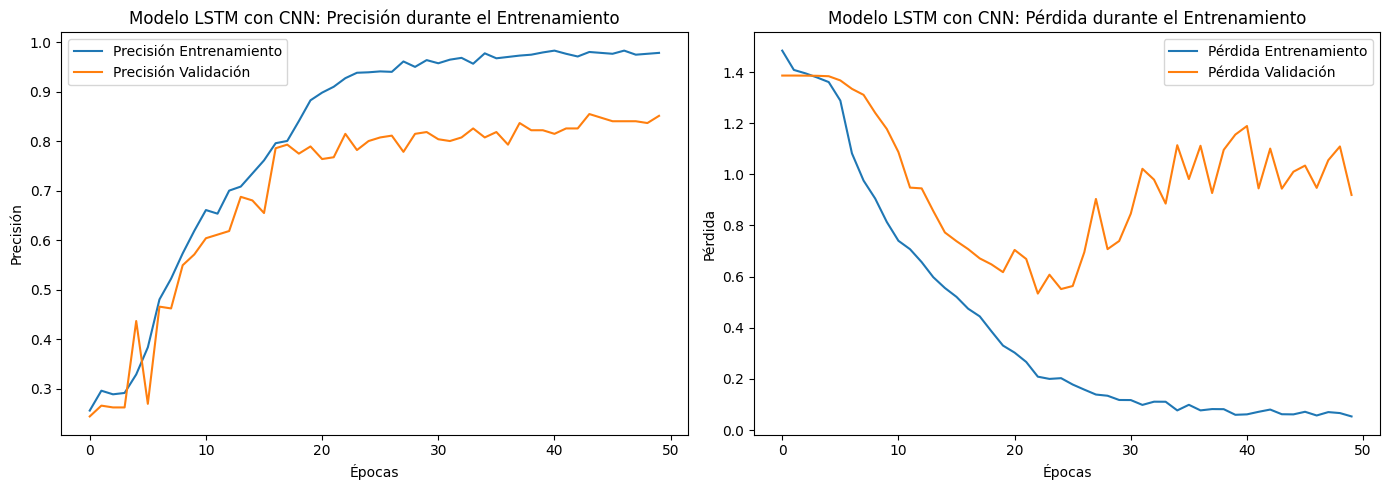

Comparación de Resultados:
Precisión final de Validación (RNN): 0.2509
Precisión final de Validación (LSTM con CNN): 0.8509


In [118]:
import matplotlib.pyplot as plt

# Función para graficar las curvas de aprendizaje
def plot_learning_curves(history, model_name):
    """
    Visualiza las curvas de precisión y pérdida para entrenamiento y validación.
    :param history: History del modelo (proporcionado por fit)
    :param model_name: Nombre del modelo (str) para los títulos
    """
    # Curvas de precisión
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión Validación')
    plt.title(f'{model_name}: Precisión durante el Entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    # Curvas de pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida Validación')
    plt.title(f'{model_name}: Pérdida durante el Entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    # Mostrar las gráficas
    plt.tight_layout()
    plt.show()

# Visualizar curvas de aprendizaje para el modelo RNN
plot_learning_curves(history_rnn, "Modelo RNN")

# Visualizar curvas de aprendizaje para el modelo LSTM con CNN
plot_learning_curves(history_lstm, "Modelo LSTM con CNN")

# Comparar resultados de validación (precisión final de ambos modelos)
print("Comparación de Resultados:")
print(f"Precisión final de Validación (RNN): {history_rnn.history['val_accuracy'][-1]:.4f}")
print(f"Precisión final de Validación (LSTM con CNN): {history_lstm.history['val_accuracy'][-1]:.4f}")


* Analsisi graficas anteriores

Análisis de las Gráficas del Modelo RNN

Gráfica 1: Precisión durante el Entrenamiento

Observaciones:
La precisión en el conjunto de entrenamiento tiene fluctuaciones significativas, oscilando entre 0.26 y 0.32 sin una tendencia clara hacia la mejora.
La precisión en el conjunto de validación es consistentemente más baja que la del conjunto de entrenamiento y muestra aún más inestabilidad, con caídas drásticas (por ejemplo, alrededor de la época 6).
La diferencia entre las curvas de entrenamiento y validación sugiere que el modelo no está generalizando bien a los datos de validación.

Implicaciones:
El modelo parece sufrir de sobreajuste en ciertos puntos, donde aprende patrones del conjunto de entrenamiento pero no logra aplicarlos al conjunto de validación.
La falta de mejora sostenida en la precisión indica que el modelo podría no estar aprendiendo representaciones significativas de los datos.

Gráfica 2: Pérdida durante el Entrenamiento

Observaciones:
La pérdida en el conjunto de entrenamiento muestra un patrón de descenso progresivo, aunque con ciertas fluctuaciones, lo que es esperado durante el entrenamiento.
La pérdida en el conjunto de validación no sigue una tendencia clara de disminución y, en algunos puntos (por ejemplo, cerca de la época 6), experimenta picos pronunciados que indican inestabilidad.
Las curvas de pérdida de validación y entrenamiento no convergen, lo que refuerza la idea de que el modelo no está generalizando adecuadamente.

Implicaciones:
Las fluctuaciones en la pérdida de validación sugieren que el modelo es sensible a los datos de entrenamiento y podría estar atrapado en mínimos locales.
El aumento en la pérdida de validación mientras que la pérdida de entrenamiento disminuye indica sobreajuste temprano, lo cual podría ser causado por una arquitectura del modelo demasiado simple (en comparación con la complejidad de los datos) o por hiperparámetros mal ajustados.

Fortalezas del Modelo RNN

Capacidad de Secuencialidad:
El RNN tiene una arquitectura diseñada para procesar secuencias de datos, lo que lo hace adecuado para textos, donde el orden de las palabras es importante.
Sin embargo, en este caso específico, el modelo parece tener dificultades para capturar patrones significativos a largo plazo en los datos.

Rápido de Entrenar:
Debido a su simplicidad en comparación con modelos más complejos como LSTM, el RNN es más rápido de entrenar. Esto es útil cuando se necesita realizar múltiples pruebas de ajuste rápido.

Debilidades del Modelo RNN

Inestabilidad de las Métricas:
Las gráficas muestran fluctuaciones significativas tanto en la precisión como en la pérdida, especialmente en los datos de validación. Esto indica que el modelo es incapaz de aprender de manera consistente.
La precisión de validación es más baja que la precisión de entrenamiento, lo que sugiere sobreajuste y una falta de generalización.

Dificultad con Dependencias a Largo Plazo:
El modelo RNN, por diseño, tiene limitaciones para manejar dependencias a largo plazo en las secuencias de datos, lo que podría explicar el bajo rendimiento en esta tarea de clasificación.

Precisión General Baja:
La precisión general del modelo es baja (alrededor de 25%), lo que implica que el modelo apenas está por encima del rendimiento aleatorio para las cuatro clases.

*------------------------------------------------------------------------------------------------------------------------------------------

Gráfica 2: Pérdida durante el Entrenamiento

Observaciones:
La pérdida en el conjunto de entrenamiento muestra un patrón de descenso progresivo, aunque con ciertas fluctuaciones, lo que es esperado durante el entrenamiento.
La pérdida en el conjunto de validación no sigue una tendencia clara de disminución y, en algunos puntos (por ejemplo, cerca de la época 6), experimenta picos pronunciados que indican inestabilidad.
Las curvas de pérdida de validación y entrenamiento no convergen, lo que refuerza la idea de que el modelo no está generalizando adecuadamente.

Implicaciones:
Las fluctuaciones en la pérdida de validación sugieren que el modelo es sensible a los datos de entrenamiento y podría estar atrapado en mínimos locales.
El aumento en la pérdida de validación mientras que la pérdida de entrenamiento disminuye indica sobreajuste temprano, lo cual podría ser causado por una arquitectura del modelo demasiado simple (en comparación con la complejidad de los datos) o por hiperparámetros mal ajustados.

Fortalezas del Modelo LSTM con CNN xxxxxxxx

Captura de Dependencias a Largo Plazo:
Las celdas LSTM están diseñadas para manejar dependencias a largo plazo en las secuencias, lo que permite al modelo capturar relaciones más complejas en los datos textuales.
Esto se refleja en el mejor rendimiento del modelo en términos de precisión, recall y F1-score.

Uso de CNN como Extractor de Características:
La inclusión de una capa convolucional (CNN) antes de la LSTM permite extraer patrones locales en las secuencias, lo que enriquece las representaciones de entrada y mejora el aprendizaje del modelo.

Estabilidad en el Entrenamiento:
Las gráficas muestran una tendencia ascendente más clara en las métricas de precisión y una pérdida de validación más estable, lo que indica un modelo más consistente y robusto.

Rendimiento Significativamente Mejor:
El modelo LSTM con CNN logra una precisión general de aproximadamente 85%, mostrando un desempeño mucho mejor en comparación con el RNN (25%). Esto indica que el modelo es capaz de generalizar mejor a los datos de validación.

Debilidades del Modelo LSTM con CNN

Mayor Complejidad:
Este modelo es más complejo que el RNN y, como resultado, requiere más tiempo de entrenamiento y mayores recursos computacionales.
Esto podría ser un desafío para datasets aún más grandes o tareas que requieran ajustes finos continuos.

Sensibilidad a Hiperparámetros:
El rendimiento de modelos complejos como el LSTM con CNN depende en gran medida de una cuidadosa configuración de hiperparámetros (dimensión del embedding, unidades de LSTM, tamaño del kernel, learning rate, etc.). Aunque los resultados actuales son buenos, ajustes adicionales podrían mejorar aún más el rendimiento.

Tendencia al Sobreajuste:
Aunque el modelo maneja bien la generalización en este caso, en datasets más pequeños o menos balanceados, podría tender al sobreajuste debido a su capacidad para aprender patrones detallados.